## Лабораторна робота №2: "Імплементація алгоритмів стиснення"

Склад команди та розподіл виконаних завдань:
Валігурський Антон, Денисова Ірина, Кравчук Андрій
- Валігурський Антон - lzw, deflate
- Денисова Ірина - lz77
- Кравчук Андрій - haffman 

Для кожного з алгоритмів поданих нижче
- опишіть як працює алгорит
- напишіть класи з методами encode та decode
- перевірте правильність кодування та декодування
- дослідіть час виконання коду в залежності від розмірів вхідних даних
- оцініть ступінь стиснення(у відсотка) в залежності від розмірів
- напишіть висновок про ефективність різних алгоритмів та умови за яких той чи інший алгоритм дають кращий результат

In [2]:
import random, string
import matplotlib.pyplot as plt
from time import time

def randomword(length):
   letters = string.ascii_lowercase
   return ''.join(random.choice(letters) for i in range(length))

lengths = range(2,10001, 1000)


# Алгоритм Гаффмана

В цьому алгоритмі доцільно імплементувати клас node та додаткові функції в Huffman для побудови дерева кодування

In [3]:
class Node:
    def __init__(self, symbol, frequency, left=None, right=None):
        self.symbol = symbol
        self.frequency = frequency
        self.left = left
        self.right = right
    
    def __repr__(self):
        return f'Node({self.frequency}, {self.symbol})'

class Huffman:
    
    def build_tree(self, text:str) -> Node:
        frequencies = {}
        for symbol in text:
            frequencies[symbol] = frequencies.get(symbol, 0) + 1
        nodes = [Node(char, freq) for char, freq in frequencies.items()]
        while len(nodes) > 1:
            nodes = sorted(nodes, key=lambda x: x.frequency)
            left = nodes.pop(0)
            right = nodes.pop(0)
            parent = Node(None, left.frequency + right.frequency)
            parent.left = left
            parent.right = right
            nodes.append(parent)
        return nodes[0]
    
    def calculate_codes(self, root: Node, curr_node = '', codes = {}) -> dict[str, str]:
        if root is None:
            return
        if root.symbol is not None:
            codes[root.symbol] = curr_node
        self.calculate_codes(root.left, curr_node + '0', codes)
        self.calculate_codes(root.right, curr_node + '1', codes)
        return codes

    def encode(self, text: str) -> tuple[str, dict[str, str]]:
        tree = self.build_tree(text)
        codes = self.calculate_codes(tree)
        return ''.join([codes[symbol] for symbol in text])

    def decode(self, code: str, coding_dict: dict[str, str]):
        decoded = ''
        curr_code = ''
        for bit in code:
            curr_code += bit
            for char, code in coding_dict.items():
                if code == curr_code:
                    decoded += char
                    curr_code = ""
                    break
        return decoded

test = 'abracadabra'
h = Huffman()
tree = h.build_tree(test)
tree
codes = h.calculate_codes(tree)
code = h.encode(test)
h.decode(code,codes)


'abracadabra'

# Алгоритм LZW

In [4]:
class LZW:
    def encode(self, text: str) -> tuple[str, list]:
        i = 0
        len_ = len(text)
        code = []

        start_dict = list(set(text))
        dict_ = start_dict[:]

        new_entry = ""
        while i < len_:
            new_entry += text[i]
            i += 1
            if new_entry not in dict_:
                dict_.append(new_entry)
                code.append(dict_.index(new_entry[:-1]))
                new_entry = ""
                i -= 1
                
        if new_entry not in dict_:
            dict_.append(new_entry)
        code.append(dict_.index(new_entry))
        
                
        return code, start_dict

        
    def decode(self, code: str, coding_dict: list) -> str:
        decoded_text = ""
        i = 0

        for symb in code:
            symb = int(symb)
            if int(symb) >= len(coding_dict):
                while len(coding_dict) <= symb:
                    new_entry = decoded_text[i]
                    i += 1
                    while i < len(decoded_text) and new_entry in coding_dict:
                        new_entry += decoded_text[i]
                        i += 1
                    if new_entry in coding_dict:
                        for new_char in new_entry:
                            new_entry += new_char
                            i+=1
                            if new_entry not in coding_dict:
                                break

                    coding_dict.append(new_entry)
                    i -= 1
            decoded_text += coding_dict[symb]

        return decoded_text







# Алгоритм LZ77

Потрібно заміряти розміри саме тексту, проте для роботи доцільно використовувати список тюплів, тому для зручності варто імплементувати додаткові алгоритми _text2list та _list2text

In [5]:
class LZ77:
    def __init__(self, buffer_size: int):
        pass

    def encode(self, text: str) -> str:
        pass

    def decode(self, code: str) -> str:
        pass

# Алгоритм Deflate

In [6]:
class Deflate:
    def __init__(self, buffer_size: int):
        self.buffer_size = buffer_size

    def encode(self, text: str) -> str:
        pass

    def decode(self, code: str) -> str:
        pass

# Testing

LZW compression percentage
LZW effectivenes: 0.5
LZW effectivenes: 0.7177650429799427
LZW effectivenes: 0.7878787878787878
LZW effectivenes: 0.8482622209663747
LZW effectivenes: 0.8824696802646086
LZW effectivenes: 0.940756065450442
LZW effectivenes: 0.9359114299079994
LZW effectivenes: 0.9457050243111832
LZW effectivenes: 0.9707630716971977
LZW effectivenes: 1.0043512216891666


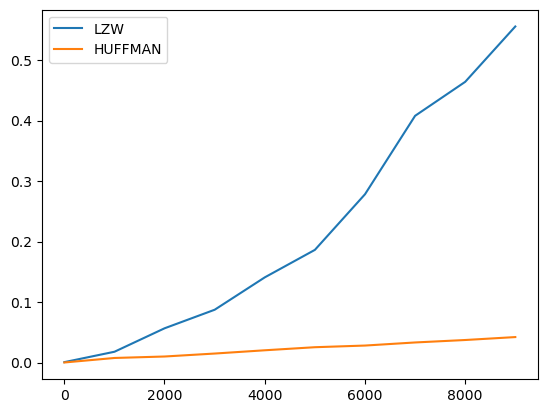

In [12]:
X = [i for i in lengths]
Y_LZW = []
Y_HUFFMAN = []

beg = 1
print("LZW compression percentage")
for i in lengths:

    to_code = randomword(i)
    start = time()
    code, dict_ = LZW().encode(to_code)
    decoded = LZW().decode(code, dict_)
    Y_LZW.append(time()-start)
    assert to_code == decoded
    
    print("LZW effectivenes:",i / (len(code) + len(dict_)))
    
    start = time()

    h = Huffman()
    codes = h.calculate_codes(tree)
    code = h.encode(to_code)
    decoded = h.decode(code,codes)
    Y_HUFFMAN.append(time()-start)
    assert to_code==decoded

    
    
plt.plot(X, Y_LZW, label = "LZW")
plt.plot(X, Y_HUFFMAN, label = "HUFFMAN")
plt.xlabel = "length of string"
plt.ylabel = "time perfomance"

plt.legend()
plt.show()


### LZW
Очевидно, що зі зростанням кількості елементів в повідомленні, час стиснення відповідно зростає. На жаль, через повільнісь мови програмування Python нам не вдастся перевірити ефективність стиснення на повну, адже алгоритм розкриваєтсья на повну потужність на великих файлах, таких як картинки, в яких дуже багато повторен. Це можна довести тим, що зі збільшенням елементів відслідковується збільшення ефективності стиснення.